**Audrey Quessada**  
  
# MDI341: TP Graphs

In [1]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import os.path
import urllib
from urllib.request import urlretrieve
import tarfile
import warnings
import time
import pandas as pd
from numpy.linalg import inv
from IPython.display import display, HTML
warnings.filterwarnings('ignore')

**Note** : la documentation de NetworkX se trouve [ici](http://networkx.readthedocs.io/)

In [2]:
seed = 42 

## Analyse de graphes

### Erdős-Rényi

#### Question 1

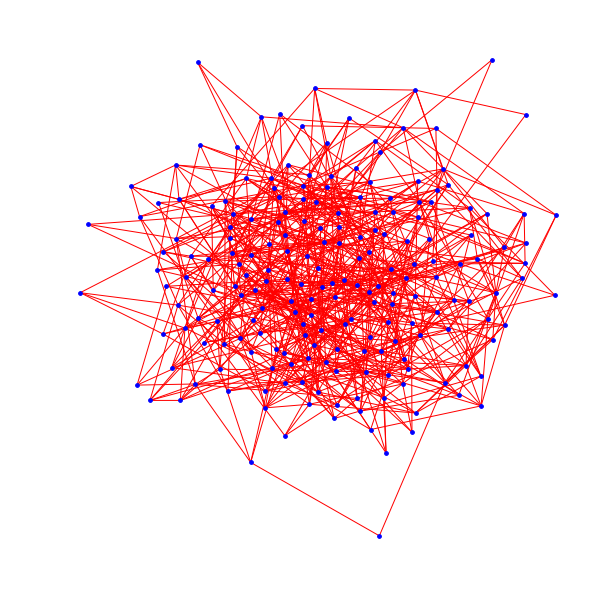

In [3]:
n = 200
p = 0.04
G_erdos = nx.erdos_renyi_graph(n, p, seed=seed, directed=False)
plt.figure(figsize=(8, 8))
nx.draw(G_erdos, node_size=14, node_color='b', edge_color='r')

#### Question 2

In [4]:
nb_node_erdos = G_erdos.number_of_nodes()
print('le nombre de noeuds du graphe Erdös est:')
print(nb_node_erdos)

le nombre de noeuds du graphe Erdös est:
200


On retrouve bien le paramètre `n` introduit pour la construction du graphe Erdös-Renyi.

In [5]:
nb_edge_erdos = G_erdos.number_of_edges()
print('le nombre d\'arêtes du graphe Erdös est:')
print(nb_edge_erdos)

le nombre d'arêtes du graphe Erdös est:
742


In [6]:
deg_list_erdos = np.array(sorted(nx.degree(G_erdos).values()))
deg_min_erdos = deg_list_erdos.min()
deg_max_erdos = deg_list_erdos.max()
deg_med_erdos = np.median(deg_list_erdos)
deg_moy_erdos = deg_list_erdos.mean()
print('* le degré minimum du graphe Erdös est: ', deg_min_erdos)
print('* le degré maximum du graphe Erdös est: ', deg_max_erdos)
print('* le degré median du graphe Erdös est: ', deg_med_erdos)
print('* le degré moyen du graphe Erdös est: ', deg_moy_erdos)


* le degré minimum du graphe Erdös est:  2
* le degré maximum du graphe Erdös est:  15
* le degré median du graphe Erdös est:  7.0
* le degré moyen du graphe Erdös est:  7.42


La distribution des degrés suit une loi binomiale dans le cas d'un graphe d'Erdös et donc l'espérance de cette probabilité est $n\times p$ soit $200\times 0.04 = 8$.  
Le résultat obtenu en calculant la moyenne des degrés est assez proche de l'espérance.

#### Question 3

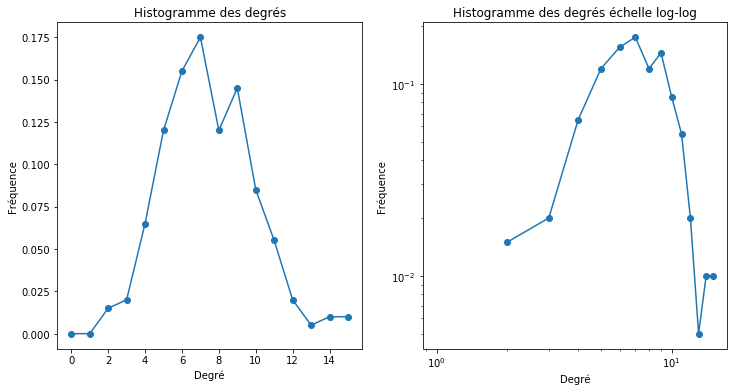

In [7]:
plt.figure(figsize=(12, 6))
histo_erdos = nx.degree_histogram(G_erdos)
hist_norm_erdos = [i*1.0/n for i in histo_erdos]
plt.subplot(1, 2, 1)
plt.plot(hist_norm_erdos, marker='o')
plt.title("Histogramme des degrés")
plt.ylabel("Fréquence")
plt.xlabel("Degré")
plt.subplot(1, 2, 2)
plt.loglog(hist_norm_erdos, marker='o')
plt.title("Histogramme des degrés échelle log-log")
plt.ylabel("Fréquence")
plt.xlabel("Degré")

   Pour les graphes Erdös-Renyi, on devrait obtenir une distribution des degrés centrée autour de la moyenne ce qui est le cas ici.

#### Question 4

In [8]:
nb_clustering_erdos = np.array(sorted(nx.clustering(G_erdos).values()))
print('le coefficient de clustering gobal est: ', nb_clustering_erdos.mean())

le coefficient de clustering gobal est:  0.0388838938839


En théorie l'espérance du clustering pour les graphes Erdös-Renyi est $p$.  
On obtient ici un résultat proche de $p=0.04$.

#### Question 5

Pour avoir une idée de l'effet petit monde, on va calculer le diamètre du graphe et le plus court chemin

In [9]:
diam_erdos = nx.diameter(G_erdos)
print('le diamètre du graphe Erdös est: ', diam_erdos)

le diamètre du graphe Erdös est:  5


In [10]:
short_erdos = nx.average_shortest_path_length(G_erdos)
print('la moyenne des plus courts chemins du graphe Erdös est: ', short_erdos)

la moyenne des plus courts chemins du graphe Erdös est:  2.844070351758794


Pour que l'on puisse parler d'un effet "petit monde", il faudrait que le coefficient de clustering soit élévé et que la moyenne des plus courts chemins soit petite ainsi que le diamètre du graphe.  
Dans ce cas, on peut en effet parler d'effet petit monde.

### Barabási–Albert

#### Question 6

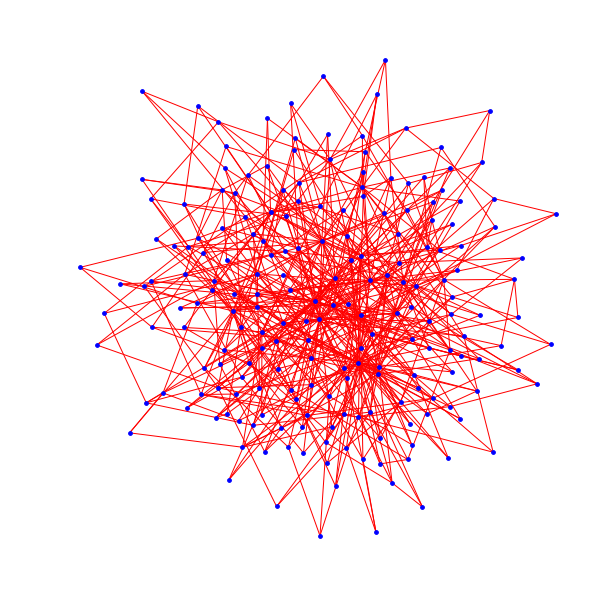

In [11]:
n = 200
m = 3
G_barabasi = nx.barabasi_albert_graph(n, m, seed=seed)
plt.figure(figsize=(8, 8))
nx.draw(G_barabasi, node_size=14, node_color='b', edge_color='r')

In [12]:
nb_node_barabasi = G_barabasi.number_of_nodes()
print('le nombre de noeuds du graphe barabasi est:')
print(nb_node_barabasi)
nb_edge_barabasi = G_barabasi.number_of_edges()
print('le nombre d\'arêtes du graphe barabasi est:')
print(nb_edge_barabasi)
deg_list_barabasi = np.array(sorted(nx.degree(G_barabasi).values()))
deg_min_barabasi = deg_list_barabasi.min()
deg_max_barabasi = deg_list_barabasi.max()
deg_med_barabasi = np.median(deg_list_barabasi)
deg_moy_barabasi = deg_list_barabasi.mean()
print('* le degré minimum du graphe barabasi est: ', deg_min_barabasi)
print('* le degré maximum du graphe barabasi est: ', deg_max_barabasi)
print('* le degré median du graphe barabasi est: ', deg_med_barabasi)
print('* le degré moyen du graphe barabasi est: ', deg_moy_barabasi)


le nombre de noeuds du graphe barabasi est:
200
le nombre d'arêtes du graphe barabasi est:
591
* le degré minimum du graphe barabasi est:  3
* le degré maximum du graphe barabasi est:  40
* le degré median du graphe barabasi est:  4.0
* le degré moyen du graphe barabasi est:  5.91


Par rapport à un graphe Erdös, le nombre d'arêtes est plus faible, ainsi que les degrés médian et moyen.

les coefficients de régression pour la loi de puissance sont:  [-1.61054134 -0.29053009]


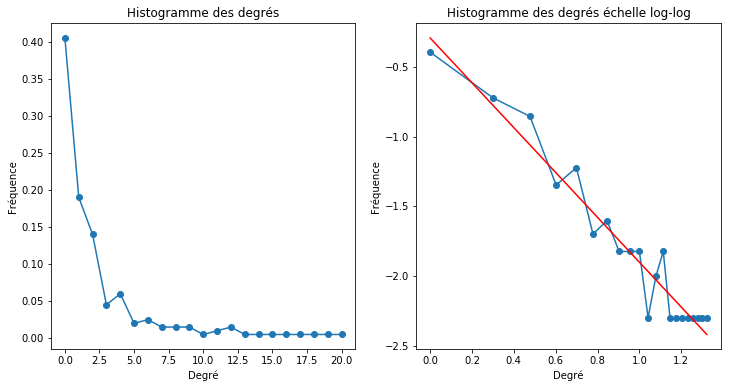

In [13]:
plt.figure(figsize=(12, 6))
histo_barabasi = nx.degree_histogram(G_barabasi)
hist_norm_barabasi = [i*1.0/n for i in histo_barabasi if i!=0]

#on va fitter la courbe en échelle log log pour en déduire la loi de puissance
x = [i for i in range(1, len(hist_norm_barabasi)+1)]
logx = np.log10(x)
logy = np.log10(hist_norm_barabasi)
coefficients = np.polyfit(logx, logy, 1)
print('les coefficients de régression pour la loi de puissance sont: ', coefficients)
polynomial = np.poly1d(coefficients)
ys = polynomial(logx)

#on trace les graphes
plt.subplot(1, 2, 1)
plt.plot(hist_norm_barabasi, marker='o')
plt.title("Histogramme des degrés")
plt.ylabel("Fréquence")
plt.xlabel("Degré")
plt.subplot(1, 2, 2)
plt.plot(logx, logy,marker='o')
plt.plot(logx, ys, 'r')                      
plt.title("Histogramme des degrés échelle log-log")
plt.ylabel("Fréquence")
plt.xlabel("Degré")

On voit ici en échelle loglog qu'on obtient une droite dont le coefficient directeur est -1.61, ce qui correspond bien à une loi de puissance.

In [14]:
nb_clustering_barabasi = np.array(sorted(nx.clustering(G_barabasi).values()))
print('le clustering moyen du graphe est: ', nb_clustering_barabasi.mean())

le clustering moyen du graphe est:  0.104598730965


En revanche par rapport au graphe d'Erdös, le clustering moyen est beaucoup plus élevé.

In [15]:
diam_barabasi = nx.diameter(G_barabasi)
print('le diamètre du graphe Barabasi est: ', diam_barabasi)
short_barabasi = nx.average_shortest_path_length(G_barabasi)
print('la moyenne des plus courts chemins du graphe Barabasi est: ', short_barabasi)

le diamètre du graphe Barabasi est:  5
la moyenne des plus courts chemins du graphe Barabasi est:  2.8552261306532665


On retrouve également un effet "petit monde" avec un diamètre de graphe égal à celui d'Erdös et une moyenne des plus courts chemins sensiblement similaire.

## Graphe Karate Club

D'après Wikipédia (https://en.wikipedia.org/wiki/Zachary%27s_karate_club), le réseau social du karaté club a été étudié entre 1970 et 1972. 34 membres du club ont été répertoriés. Pendant l'étude, un conflit entre un administrateur et un instructeur a éclaté, ce qui a conduit à la formation de 2 factions.

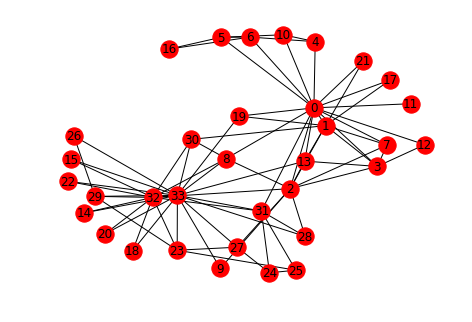

In [16]:
n=34
G_karate = nx.karate_club_graph()

# on définit une position des noeuds qui peut être ré-utilisée plusieurs fois
# en appelant la fonction nx.draw avec l'option pos=pos
pos = nx.spring_layout(G_karate)
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

#### Question 7

0.25618815422058105


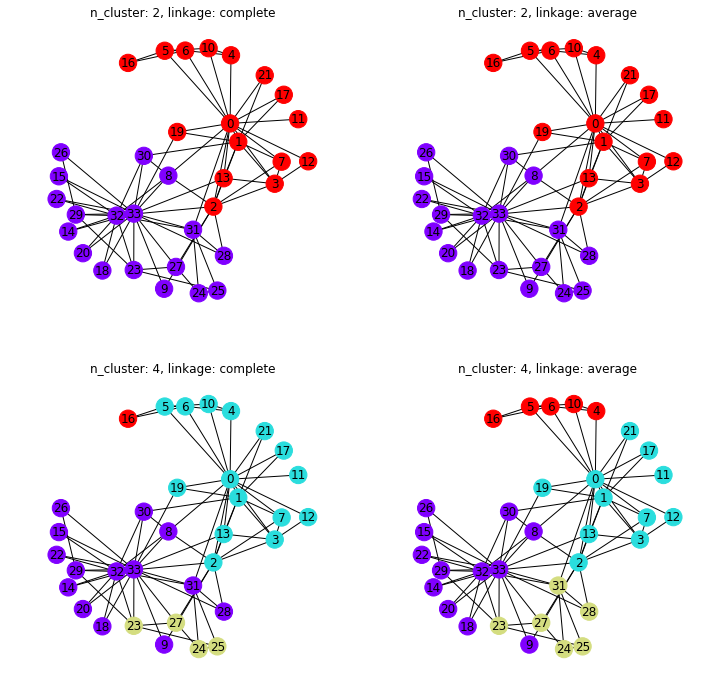

In [17]:
# le code suivant calcule une matrice de taille n x n
# distances[i, j] contient la longueur du plus court chemin entre les noeuds i et j
pcc_longueurs = nx.all_pairs_shortest_path_length(G_karate)
distances = np.zeros((n,n))
linkage = ['complete', 'average']
clust = [2, 4]
#création de la matrie distances
for i in range(n):
    for j in range(n):
        distances[i, j] = pcc_longueurs[i][j]
        
start = time.time()
#application du modèle de clustering hierarchique
fig = plt.figure(figsize=(12, 12))
i = 1
for c in clust:
    for l in linkage:
        model = AgglomerativeClustering(n_clusters=c, affinity='precomputed', linkage=l)
        model.fit(distances)
        plt.subplot(2, 2, i)
        nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), node_color=model.labels_, with_labels=True, pos=pos)
        title = 'n_cluster: '+str(c)+', linkage: '+l
        plt.title(title)
        i += 1
stop = time.time()
print(stop-start)

On voit que quand on prend comme paramètre un nombre de clusters égal à 2, que le paramètre de linkage soit complet ou moyen ne change rien à la représentation du graphe.  
En revanche pour un nombre de cluster égal à 4, il existe une différence entre les représentations du graphe. Le critère de linkage détermine quelle distance utiliser entre 2 sets d'observation, le linkage average utilise la distance moyenne et le complete linkage utilise la distance max entre toutes les observations de deux sets.


#### Question 8

On va mettre en évidence visuellement les différences entre quelques mesures de centralité des noeuds

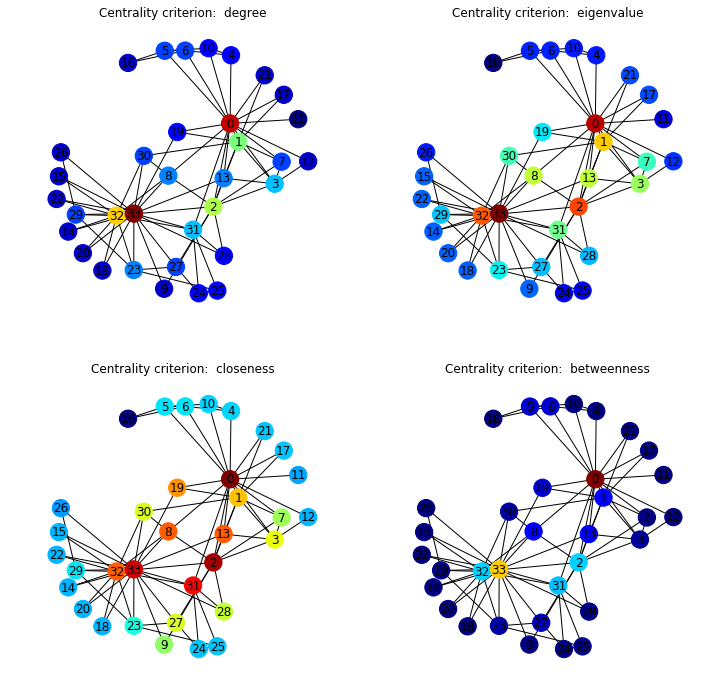

In [18]:
# conseil: utiliser l'option cmap = plt.get_cmap('jet') de nx.draw
# les couleurs iront du bleu foncé (peu central) au rouge foncé (très central)
deg_karate = nx.degree_centrality(G_karate)
eig_karate = nx.eigenvector_centrality(G_karate)
clos_karate = nx.closeness_centrality(G_karate)
bet_karate = nx.betweenness_centrality(G_karate)

deg_colors = [x[1] for x in deg_karate.items()]
eig_colors = [x[1] for x in eig_karate.items()]
clos_colors = [x[1] for x in clos_karate.items()]
bet_colors = [x[1] for x in bet_karate.items()]

fig = plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
nx.draw(G_karate, cmap = plt.get_cmap('jet'), node_color=deg_colors, with_labels=True, pos=pos)
plt.title('Centrality criterion:  degree')
plt.subplot(2, 2, 2)
nx.draw(G_karate, cmap = plt.get_cmap('jet'), node_color=eig_colors, with_labels=True, pos=pos)
plt.title('Centrality criterion:  eigenvalue')
plt.subplot(2, 2, 3)
nx.draw(G_karate, cmap = plt.get_cmap('jet'), node_color=clos_colors, with_labels=True, pos=pos)
plt.title('Centrality criterion:  closeness')
plt.subplot(2, 2, 4)
nx.draw(G_karate, cmap = plt.get_cmap('jet'), node_color=bet_colors, with_labels=True, pos=pos)
plt.title('Centrality criterion:  betweenness')

On voit ici que les noeuds 0 et 33 sont assez centraux et donc les centres de chaque cluster. On peut certainement les associer avec l'administrateur et l'instructeur qui sont entrés en conflit.  
Avec la méthode des valeurs propres, les noeuds dont les voisins sont bien connectés sont plus importants, alors qu'avec la méthode closeness, les noeuds les plus importants sont ceux qui sont les plus proches des autres. La méthode betweeness donne plutôt du poids aux noeuds qui font le lien entre cluster.

### Graphe des produits Amazon

#### Question 9 (bonus +2 pts)

On récupère ici un graphe dont les noeuds sont des produits vendus par Amazon, et deux noeuds sont connectés si les deux produits sont fréquemment achetés ensemble.  
On va analyser ce graphe en utilisant les critères vus précédemment.

In [19]:
if os.path.exists('amazon.txt.gz') is False:
    resp = urlretrieve('https://snap.stanford.edu/data/bigdata/' +
                              'communities/com-amazon.ungraph.txt.gz', 'amazon.txt.gz')

G_amazon = nx.read_edgelist('amazon.txt.gz')

In [20]:
n_node_am = nx.number_of_nodes(G_amazon)
print('le nombre de noeuds du graphe Amazon est: ',n_node_am)
n_edge_am = nx.number_of_edges(G_amazon)
print('le nombre d\'arêtes du graphe Amazon est: ',n_edge_am)
deg_list_am = np.array(sorted(nx.degree(G_amazon).values()))
deg_min_am = deg_list_am.min()
deg_max_am = deg_list_am.max()
deg_med_am = np.median(deg_list_am)
deg_moy_am = deg_list_am.mean()
print('* le degré minimum du graphe Amazon est: ', deg_min_am)
print('* le degré maximum du graphe Amazon est: ', deg_max_am)
print('* le degré median du graphe Amazon est: ', deg_med_am)
print('* le degré moyen du graphe Amazon est: ', deg_moy_am)


le nombre de noeuds du graphe Amazon est:  334863
le nombre d'arêtes du graphe Amazon est:  925872
* le degré minimum du graphe Amazon est:  1
* le degré maximum du graphe Amazon est:  549
* le degré median du graphe Amazon est:  4.0
* le degré moyen du graphe Amazon est:  5.52985549314


Les résultats sont en accord avec le site : https://snap.stanford.edu/data/com-Amazon.html

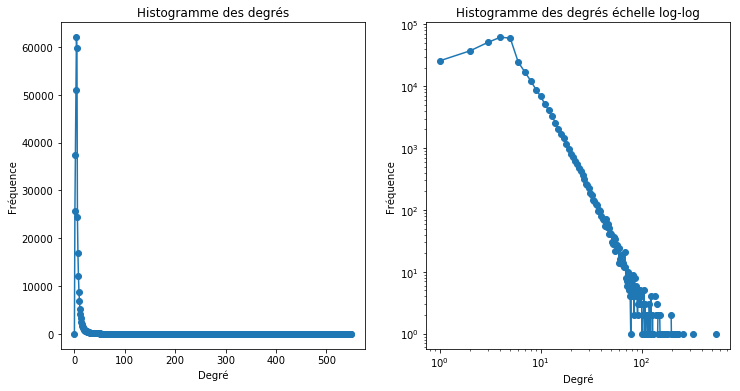

In [21]:
plt.figure(figsize=(12, 6))
histo_am = nx.degree_histogram(G_amazon)
plt.subplot(1, 2, 1)
plt.plot(histo_am, marker='o')
plt.title("Histogramme des degrés")
plt.ylabel("Fréquence")
plt.xlabel("Degré")
plt.subplot(1, 2, 2)
plt.loglog(histo_am, marker='o')
plt.title("Histogramme des degrés échelle log-log")
plt.ylabel("Fréquence")
plt.xlabel("Degré")

Grâce à l'échelle log-log on s'aperçoit que la fréquence des degrés supérieurs à 5 décroit comme une loi de puissance et donc on peut se retrouver dans le cas d'un graphe avec des propriétés similaires à Barabasi.

In [22]:
nb_clustering_am = np.array(sorted(nx.clustering(G_amazon).values()))
print(nb_clustering_am.mean())
nb_clust_avg_am = nx.average_clustering(G_amazon)
print(nb_clust_avg_am)

0.396746393279
0.396746393278744


In [23]:
print(list(nx.triangles(G_amazon).values())[:10])

[4, 3, 19, 0, 1, 10, 15, 10, 5, 1]


On regarde maintenant le coefficient de clustering moyen en fonction du degré des noeuds:

In [24]:
node_am = nx.nodes(G_amazon)

In [25]:
clust_deg = np.zeros((n_node_am,3))
for i in range(n_node_am):
    clust_deg[i,0] = i
    clust_deg[i,1] = G_amazon.degree(node_am[i])
    clust_deg[i,2] = nx.clustering(G_amazon, nodes=node_am[i])
    
column = ['node', 'degree', 'clust']
df_clust_deg = pd.DataFrame(clust_deg, columns=column)
print(display(df_clust_deg.iloc[0:10]))


,node,degree,clust
0,0.0,4.0,0.333333
1,1.0,4.0,0.833333
2,2.0,5.0,0.400000
3,3.0,4.0,0.500000
4,4.0,9.0,0.527778
5,5.0,3.0,0.000000
6,6.0,4.0,0.166667
7,7.0,8.0,0.357143
8,8.0,7.0,0.714286
9,9.0,11.0,0.200000


None


In [26]:
clust_mean = []
for k in range(deg_max_am):
    k = float(k)
    clust_mean.append(df_clust_deg[df_clust_deg.degree==k]['clust'].mean())

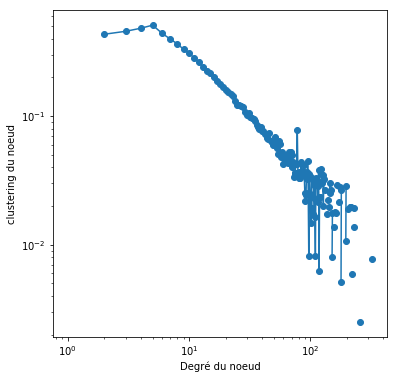

In [27]:
node_max = [i for i in range(deg_max_am)]
plt.figure(figsize=(6, 6))
plt.loglog(node_max, clust_mean, marker='o') 
plt.xlabel('Degré du noeud')
plt.ylabel('clustering du noeud')


Comme pour la courbe de la fréquence du degré moyen, on constate une décroissance en loi de puissance pour les degrés supérieurs à 4-5.

## Prédiction dans les graphes

Nombre de noeuds: 150
Nombre d'arêtes: 1693
Nombre de composantes connexes: 2


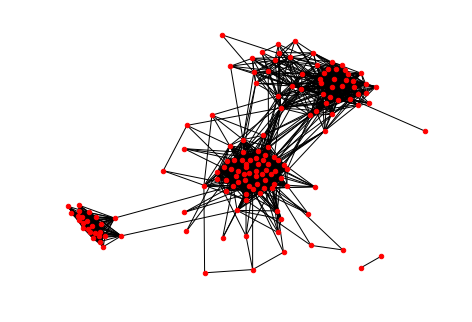

In [28]:
if os.path.exists('facebook.tar.gz') is False:
    resp = urlretrieve('https://snap.stanford.edu/data/facebook.tar.gz',
                              'facebook.tar.gz')
    tarfile.open("facebook.tar.gz", 'r:gz').extractall('.')

G_fb = nx.read_edgelist("facebook/414.edges")
n = G_fb.number_of_nodes()
m = G_fb.number_of_edges()
# on renumérote les noeuds de 0 à n-1
mapping=dict(zip(G_fb.nodes(), range(n)))
nx.relabel_nodes(G_fb, mapping, copy=False)
pos = nx.spring_layout(G_fb)
nx.draw(G_fb, node_size=20, pos=pos)
print("Nombre de noeuds: %d" % n)
print("Nombre d'arêtes: %d" % m)
print("Nombre de composantes connexes: %d" % nx.number_connected_components(G_fb))

#### Question 10

In [29]:
# G_fb_train est une copie du graphe original
# auquel on a retiré 20% des arêtes choisies aléatoirement

proportion_edges = 0.2
edge_subset = random.sample(G_fb.edges(),
                            int(proportion_edges * G_fb.number_of_edges()))
G_fb_train = G_fb.copy()
G_fb_train.remove_edges_from(edge_subset)

edge_subset_size = len(list(edge_subset))
print("Nombre d'arêtes retirées: %d" % edge_subset_size)
print("Nombre d'arêtes restantes: %d" % (m - edge_subset_size))
print("Nombre total d'arêtes non-existantes: %d" %
      len(list(nx.non_edges(G_fb_train))))

Nombre d'arêtes retirées: 338
Nombre d'arêtes restantes: 1355
Nombre total d'arêtes non-existantes: 9820


On veut scorer les arêtes non-existantes de façon à ce que les arêtes réelles retirées aient un plus grand score. On utilise plusieurs mesures de similarité entre paires de noeud et on calcule l'Aire sous la Courbe ROC (AUC). On trace également les courbes ROC pour chaque similarité.

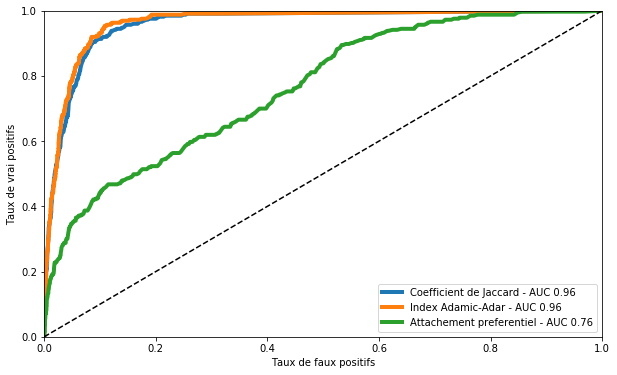

In [30]:
# exemple qui génère les scores et les labels (vrai arête ou fausse arête) avec jaccard
pred_jaccard = list(nx.jaccard_coefficient(G_fb_train))
score_jaccard, label_jaccard = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_jaccard])

# exemple qui génère les scores et les labels (vrai arête ou fausse arête) avec adamic
pred_adamic = list(nx.adamic_adar_index(G_fb_train))
score_adamic, label_adamic = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_adamic])

# exemple qui génère les scores et les labels (vrai arête ou fausse arête) avec attachement préférentiel
pred_pref = list(nx.preferential_attachment(G_fb_train))
score_pref, label_pref = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_pref])

# on regarde la métrique de la courbe ROC pour chacun des cas:

fpr_jaccard, tpr_jaccard, thresholds_jaccard = metrics.roc_curve(label_jaccard, score_jaccard)
auc_jaccard = metrics.auc(fpr_jaccard, tpr_jaccard)

fpr_adamic, tpr_adamic, thresholds_adamic = metrics.roc_curve(label_adamic, score_adamic)
auc_adamic = metrics.auc(fpr_adamic, tpr_adamic)

fpr_pref, tpr_pref, thresholds_pref = metrics.roc_curve(label_pref, score_pref)
auc_pref = metrics.auc(fpr_pref, tpr_pref)

# afficher ROC curve et AUC
plt.figure(figsize=(10, 6))
plt.plot(fpr_jaccard, tpr_jaccard, label='Coefficient de Jaccard - AUC %.2f' % auc_jaccard, linewidth=4)
plt.plot(fpr_adamic, tpr_adamic, label='Index Adamic-Adar - AUC %.2f' % auc_adamic, linewidth=4)
plt.plot(fpr_pref, tpr_pref, label='Attachement preferentiel - AUC %.2f' % auc_pref, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrai positifs')
plt.legend(loc='lower right')
plt.show()

#### Question 11

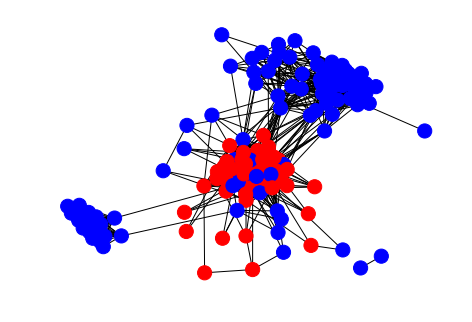

In [31]:
# on charge les labels des noeuds et on les affiche
with open('facebook/414.featnames') as f:
    for i, l in enumerate(f):
        pass

n_feat = i+1

features = np.zeros((n, n_feat))
f = open('facebook/414.feat', 'r')
for line in f:
    if line.split()[0] in mapping:
        node_id = mapping[line.split()[0]]
        features[node_id, :] = list(map(int, line.split()[1:]))

features = 2*features-1
feat_id = 43
labels = features[:, feat_id]

nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = labels, node_size=200, pos=pos)


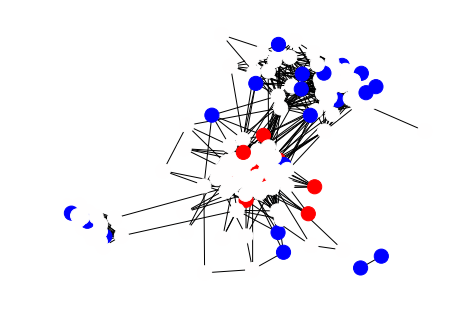

In [32]:
# on sélectionne 20% des noeuds pour lesquels on a accès à l'étiquette

random.seed(5)
proportion_nodes = 0.2
labeled_nodes = random.sample(G_fb.nodes(), int(proportion_nodes * G_fb.number_of_nodes()))

known_labels = np.zeros(n)
known_labels[labeled_nodes] = labels[labeled_nodes]

nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = known_labels, node_size=200, pos=pos)

On va maintenant appliquer la propagation de label et voir les résultats

In [33]:
alpha = 0.7
L_sym = nx.normalized_laplacian_matrix(G_fb)

# on calcule la matrice de labels initiale
Y = np.zeros((n,2))
Y[known_labels==-1, 0] = 1
Y[known_labels==1, 1] = 1

In [34]:
# propagation de labels à faire ici
I = np.identity(n)
inv_mat = inv(((1 - alpha)*I + L_sym ))
F_pred = np.dot(inv_mat,Y)

In [35]:
argmaxF = (np.argmax(F_pred, axis=1)).reshape(150,)
argmaxF[argmaxF==0] = -1
pred = [argmaxF[0,i] for i in range(n)]
print(pred)

[-1, -1, 1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, -1]


le taux de succès est:  0.74


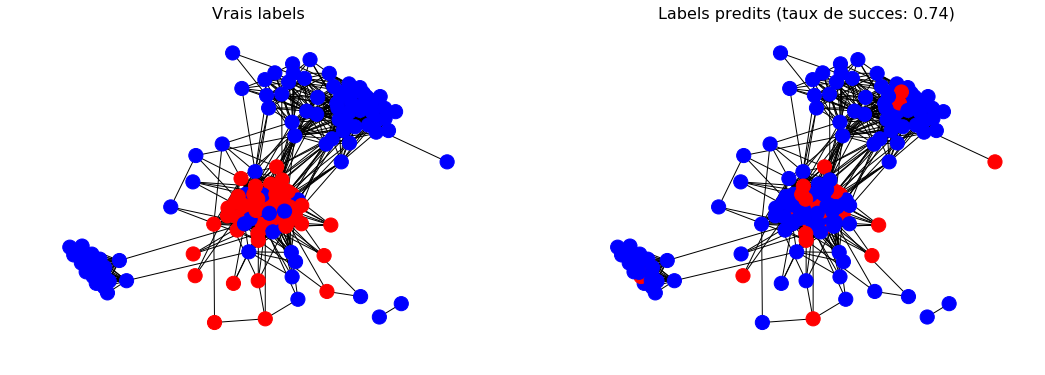

In [36]:
taux_succes = sum([pred[i]==labels[i] for i in range(n)])*1.0/n
print('le taux de succès est: ', taux_succes)
plt.figure(figsize=(18, 6))
f, axarr = plt.subplots(1, 2, num=1)
plt.sca(axarr[0])
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = labels, node_size=200, pos=pos)
axarr[0].set_title('Vrais labels', size=16)
plt.sca(axarr[1])
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = pred, node_size=200, pos=pos)
axarr[1].set_title('Labels predits (taux de succes: %.2f)' % taux_succes, size=16)


On peut tester l'effet de alpha sur le score et comparer avec la méthode itérative pour calculer F_pred

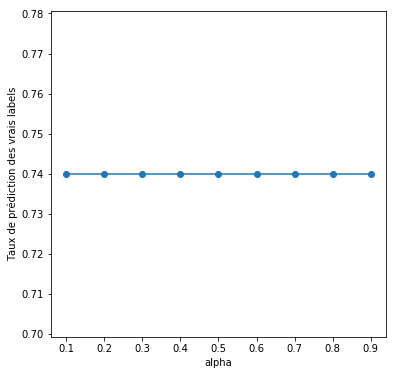

In [37]:
alpha_t = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
taux_succes_alpha = []

for a in alpha_t:
    invM = inv(((1 - a)*I + L_sym ))
    F_al= np.dot(invM,Y)
    argmaxFA = (np.argmax(F_al, axis=1)).reshape(150,)
    argmaxFA[argmaxF==0] = -1
    pred_al = [argmaxFA[0,i] for i in range(n)]
    taux_succes_alpha.append(sum([pred[i]==labels[i] for i in range(n)])*1.0/n)
    
plt.figure(figsize=(6, 6))
plt.plot(alpha_t, taux_succes_alpha, marker='o')
plt.xlabel('alpha')
plt.ylabel('Taux de prédiction des vrais labels')

Le paramètre alpha ne semble pas avoir d'influence sur le résultat de la prédiction.  
Avec la méthode itérative pour le calcul de F_pred, on retrouve des résultats similaires.

In [38]:
n_conv = 1000 
F0 = np.zeros((n, n_conv))
F1 = np.zeros((n, n_conv))
F0[:,0] = Y[:,0]
F1[:,0] = Y[:,1]

for i in range(n_conv-1):
    F0[:,i+1] = alpha * np.dot((I - L_sym),F0[:,i]) + (1 - alpha) * Y[:,0]
    F1[:,i+1] = alpha * np.dot((I - L_sym),F1[:,i]) + (1 - alpha) * Y[:,1]
    
pred_it = (np.vstack((np.mean(F0, axis=1), np.mean(F1, axis=1)))).T
argm_predit = np.argmax(pred_it, axis = 1)
argm_predit[argm_predit==0] = -1
taux_succes_it = sum([argm_predit[i]==labels[i] for i in range(n)])*1.0/n

In [39]:
print(taux_succes_it)

0.7
